In [1]:
from utils.converters import df_to_XY
from utils.readers import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.descriptivestats as std
from statsmodels.tsa.stattools import adfuller as stf
from statsmodels.tsa.api import VAR
from statsmodels.tsa import *

## Read data
## Grouping M&A volume by month

In [2]:
def reconfigure_vol_df(df):
    df['Date'] = df['Date'].dt.to_period('M')
    out = {'date': [], 'vol': []}
    for y in range(2000, 2022):
        for m in range(1, 13):
            i = f"{y}-{m}"
            d = df[df['Date'] == i]
            out['date'].append(i)
            out['vol'].append(len(d))
    df = pd.DataFrame(data=out['vol'], index=out['date'], columns=['vol'])
    df.index.name = 'date'
    return df

In [3]:
"""Groups M&A transactions of UK being the acquirer by month"""
acquirer_uk = read_acquirer_uk()
acquirer_uk = reconfigure_vol_df(acquirer_uk)
acquirer_uk

,vol
date,
2000-1,101
2000-2,117
2000-3,158
2000-4,139
2000-5,113
...,...
2021-8,60
2021-9,57
2021-10,60


In [4]:
"""Groups M&A transactions of UK being the target by month"""
target_uk= read_target_uk()
target_uk = reconfigure_vol_df(target_uk)
target_uk

,vol
date,
2000-1,0
2000-2,0
2000-3,3
2000-4,3
2000-5,2
...,...
2021-8,3
2021-9,0
2021-10,0


In [5]:
"""Net M&A volume"""
net_vol_monthly = target_uk + acquirer_uk
net_vol_monthly
std.describe(net_vol_monthly)

,vol
nobs,2.640000e+02
missing,0.000000e+00
mean,6.482576e+01
std_err,9.986393e-02
upper_ci,6.502149e+01
lower_ci,6.463003e+01
std,2.636408e+01
iqr,3.200000e+01
iqr_normal,2.372164e+01
mad,2.101245e+01


In [6]:
"""Setting index"""
net_vol_monthly.index.values.astype(str)

array(['2000-1', '2000-2', '2000-3', '2000-4', '2000-5', '2000-6',
       '2000-7', '2000-8', '2000-9', '2000-10', '2000-11', '2000-12',
       '2001-1', '2001-2', '2001-3', '2001-4', '2001-5', '2001-6',
       '2001-7', '2001-8', '2001-9', '2001-10', '2001-11', '2001-12',
       '2002-1', '2002-2', '2002-3', '2002-4', '2002-5', '2002-6',
       '2002-7', '2002-8', '2002-9', '2002-10', '2002-11', '2002-12',
       '2003-1', '2003-2', '2003-3', '2003-4', '2003-5', '2003-6',
       '2003-7', '2003-8', '2003-9', '2003-10', '2003-11', '2003-12',
       '2004-1', '2004-2', '2004-3', '2004-4', '2004-5', '2004-6',
       '2004-7', '2004-8', '2004-9', '2004-10', '2004-11', '2004-12',
       '2005-1', '2005-2', '2005-3', '2005-4', '2005-5', '2005-6',
       '2005-7', '2005-8', '2005-9', '2005-10', '2005-11', '2005-12',
       '2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6',
       '2006-7', '2006-8', '2006-9', '2006-10', '2006-11', '2006-12',
       '2007-1', '2007-2', '2007-3', '200

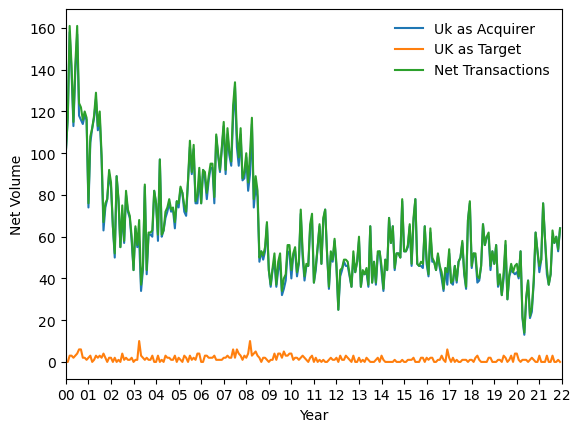

In [7]:
ax = plt.gca()
ax.plot(acquirer_uk.index.values.astype(str), acquirer_uk.vol, label='Uk as Acquirer')
ax.plot(target_uk.index.values.astype(str), target_uk.vol, label='UK as Target')
ax.plot(net_vol_monthly.index.values.astype(str), net_vol_monthly.vol, label='Net Transactions')
ax.set_xticks([])
ax.legend(frameon=False)
ax.set_xticks(ticks=range(0, 265, 12), labels=[str(i).zfill(2) for i in range(0, 23, 1)])
ax.set_xlim(0, 264)
ax.set_ylabel('Net Volume')
ax.set_xlabel('Year');

## GDP

In [8]:
gdp_quarter = read_gdp()
until = '2022-01'
gdp_quarter['Date'] = gdp_quarter['Date'].dt.to_period('M')
gdp_quarter = gdp_quarter[gdp_quarter['Date'] < until]
gdp_quarter

,Date,UK_GDP
0,2000-02,403407.0
1,2000-05,406049.0
2,2000-08,408120.0
3,2000-11,409871.0
4,2001-02,413381.0
...,...,...
83,2020-11,509621.0
84,2021-02,503663.0
85,2021-05,536608.0
86,2021-08,546084.0


In [9]:
res = []
for i in range(int(len(net_vol_monthly)/3)):
    s = net_vol_monthly[3*i: 3*(i+1)]
    res.append(s.vol.sum())
gdp_quarter['vol'] = res
gdp_quarter

,Date,UK_GDP,vol
0,2000-02,403407.0,379
1,2000-05,406049.0,399
2,2000-08,408120.0,407
3,2000-11,409871.0,353
4,2001-02,413381.0,296
...,...,...,...
83,2020-11,509621.0,154
84,2021-02,503663.0,171
85,2021-05,536608.0,141
86,2021-08,546084.0,162


## Variables

In [10]:
until = '2022-01'
var_monthly = read_variable_monthly()
interest_rate = read_interest_rate()
interest_rate['Date'] = interest_rate['Date'].dt.to_period('M')
var_monthly['Date'] = var_monthly['Date'].dt.to_period('M')
var_monthly = var_monthly[var_monthly['Date'] < until]
interest_rate = interest_rate[interest_rate['Date'] < until]
var_monthly['vol'] = net_vol_monthly.vol.values
var_monthly['Interest_Rate'] = interest_rate['Interest_Rate']

res = {'EXUSUK': [], 'Interest_Rate': [], 'SMI': []}
for i in range(int(len(var_monthly)/3)):
    s = var_monthly[3*i: 3*(i+1)]
    res['EXUSUK'].append(s.EXUSUK.mean())
    res['Interest_Rate'].append(s['Interest_Rate'].mean())
    res['SMI'].append(s.SMI.mean())
gdp_quarter['EXUSUK'] = res['EXUSUK']
gdp_quarter['Interest_Rate'] = res['Interest_Rate']
gdp_quarter['SMI'] = res['SMI']
# gdp_quarter
var_monthly

,Date,EXUSUK,Interest_Rate,SMI,vol
0,2000-01,1.6404,5.8227,1335.808,101
1,2000-02,1.6000,5.6347,1201.506,117
2,2000-03,1.5799,5.3707,1188.530,161
3,2000-04,1.5823,5.3213,1232.977,142
4,2000-05,1.5090,5.4033,1181.588,115
...,...,...,...,...,...
259,2021-08,1.3797,0.6440,1154.280,63
260,2021-09,1.3732,0.8023,1150.933,57
261,2021-10,1.3701,1.0830,1113.011,60
262,2021-11,1.3463,0.9394,1167.690,54


# Regression

In [11]:
"""To determine the effect the Brexit, we refer to the day of UK announcing its plan to exit the European Union as the separation date"""

x_index = ['EXUSUK', 'Interest_Rate', 'SMI']
y_index = ['vol']

start_from = '2002-01'
data = var_monthly[var_monthly.Date >= start_from]
data.reset_index(inplace=True, drop=True)
sep = '2016-6'
data_before = data[data.Date < sep]
data_after = data[data.Date > sep]

"""Regressing on historical transactions between 2000 to June.2016"""
X_train, Y_train = df_to_XY(data_before, xkeys=x_index, ykeys=y_index)
X_train = sm.add_constant(X_train)

"""Regressing on """
X_test, Y_test = df_to_XY(data_after, xkeys=x_index, ykeys=y_index)
X_test = sm.add_constant(X_test)

model_before = LinearRegression().fit(X_train, Y_train)
model_after = LinearRegression().fit(X_test, Y_test)


"""R square of model before the announcement of Brexit"""
model_before.score(X_train, Y_train), model_after.score(X_test, Y_test)

(0.617764976094516, 0.2318908533369991)

In [12]:
model_before.coef_

array([[ 0.        , 22.12368281,  9.46650448,  0.03523657]])

In [13]:
model_before.intercept_

array([-47.23048748])

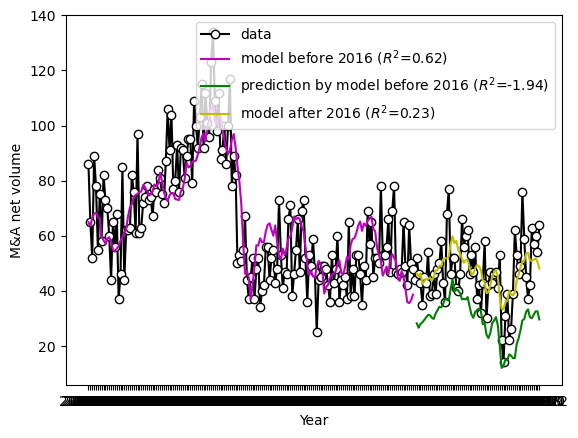

In [14]:
ax = plt.gca()

x_data = data.Date.astype(str)
ax.plot(x_data, data.vol, marker='o', color='k', mfc='white', ls='-', label='data')

Y_train_pred = model_before.predict(X_train)
x_data_before = data_before.index
r = r2_score(Y_train, Y_train_pred,)
ax.plot(x_data_before, Y_train_pred, color='m',
        label=f'model before 2016 ($R^2$={round(r, 2)})')

x_data_after = data_after.index
Y_test_pred = model_before.predict(X_test)
r = r2_score(Y_test, Y_test_pred)
ax.plot(x_data_after, Y_test_pred, color='g',
        label=f'prediction by model before 2016 ($R^2$={round(r, 2)})')


"""Using model based on data before June.2016 to predict for 2016 - 2021"""
Y_test_pred = model_after.predict(X_test)
r = r2_score(Y_test, Y_test_pred)
ax.plot(x_data_after, Y_test_pred, color='y',
        label=f'model after 2016 ($R^2$={round(r, 2)})')

# ax.axvline(65, ls='--', color='gray')
# plt.xticks(ticks=range(0, 89, 4), labels=[str(i).zfill(2) for i in range(0, 23, 1)])
# ax.set_xlim(0, 88)
ax.set_ylabel('M&A net volume')
ax.set_xlabel('Year')
# ax.set_ylim(0, -500)
ax.legend(loc=0, frameon=True);

In [15]:
multi_model_before = sm.OLS(Y_train, X_train).fit()

In [16]:
# fig = sm.graphics.plot_regress_exog(multi_model, 4)

In [17]:
print(multi_model_before.summary())
# ['EXUSUK', 'Interest_Rate', 'SMI', 'UK_GDP']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     91.05
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           4.19e-35
Time:                        10:59:38   Log-Likelihood:                -694.33
No. Observations:                 173   AIC:                             1397.
Df Residuals:                     169   BIC:                             1409.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.2305     12.210     -3.868      0.0

In [18]:
sm.add_constant(X_train)

array([[1.000000e+00, 1.432200e+00, 4.917100e+00, 9.620250e+02],
       [1.000000e+00, 1.422700e+00, 4.925100e+00, 9.247590e+02],
       [1.000000e+00, 1.423000e+00, 5.220200e+00, 9.278460e+02],
       [1.000000e+00, 1.442900e+00, 5.233100e+00, 9.595870e+02],
       [1.000000e+00, 1.459800e+00, 5.268900e+00, 9.467550e+02],
       [1.000000e+00, 1.483700e+00, 5.099000e+00, 9.327910e+02],
       [1.000000e+00, 1.556500e+00, 5.002700e+00, 9.009680e+02],
       [1.000000e+00, 1.536800e+00, 4.746000e+00, 7.894540e+02],
       [1.000000e+00, 1.556300e+00, 4.500600e+00, 8.113480e+02],
       [1.000000e+00, 1.557500e+00, 4.616000e+00, 7.440860e+02],
       [1.000000e+00, 1.571100e+00, 4.637800e+00, 7.791010e+02],
       [1.000000e+00, 1.586300e+00, 4.564400e+00, 8.062920e+02],
       [1.000000e+00, 1.617500e+00, 4.389900e+00, 7.910760e+02],
       [1.000000e+00, 1.607900e+00, 4.213100e+00, 7.562520e+02],
       [1.000000e+00, 1.582500e+00, 4.324300e+00, 7.273910e+02],
       [1.000000e+00, 1.5

In [19]:
multi_model_before.model.exog

array([[1.000000e+00, 1.432200e+00, 4.917100e+00, 9.620250e+02],
       [1.000000e+00, 1.422700e+00, 4.925100e+00, 9.247590e+02],
       [1.000000e+00, 1.423000e+00, 5.220200e+00, 9.278460e+02],
       [1.000000e+00, 1.442900e+00, 5.233100e+00, 9.595870e+02],
       [1.000000e+00, 1.459800e+00, 5.268900e+00, 9.467550e+02],
       [1.000000e+00, 1.483700e+00, 5.099000e+00, 9.327910e+02],
       [1.000000e+00, 1.556500e+00, 5.002700e+00, 9.009680e+02],
       [1.000000e+00, 1.536800e+00, 4.746000e+00, 7.894540e+02],
       [1.000000e+00, 1.556300e+00, 4.500600e+00, 8.113480e+02],
       [1.000000e+00, 1.557500e+00, 4.616000e+00, 7.440860e+02],
       [1.000000e+00, 1.571100e+00, 4.637800e+00, 7.791010e+02],
       [1.000000e+00, 1.586300e+00, 4.564400e+00, 8.062920e+02],
       [1.000000e+00, 1.617500e+00, 4.389900e+00, 7.910760e+02],
       [1.000000e+00, 1.607900e+00, 4.213100e+00, 7.562520e+02],
       [1.000000e+00, 1.582500e+00, 4.324300e+00, 7.273910e+02],
       [1.000000e+00, 1.5

## Homoscedasticity Test

In [20]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(multi_model_before.resid, multi_model_before.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3.9835635374341605),
 ('p-value', 0.26324444946050507),
 ('f-value', 1.327725381658329),
 ('f p-value', 0.26707283180438235)]

## Multicollinearity Test with Variance Inflation Factor

In [21]:
VIF = [variance_inflation_factor(multi_model_before.model.exog, i) for i in range(1,4)]
VIF_data = pd.DataFrame(VIF, columns=['VIF'])
VIF_data.index = ['EXUSUK', 'Interest_Rate', 'SMI']
VIF_data

,VIF
EXUSUK,4.470705
Interest_Rate,2.662402
SMI,2.821100


## Forecasting

<AxesSubplot:xlabel='date'>

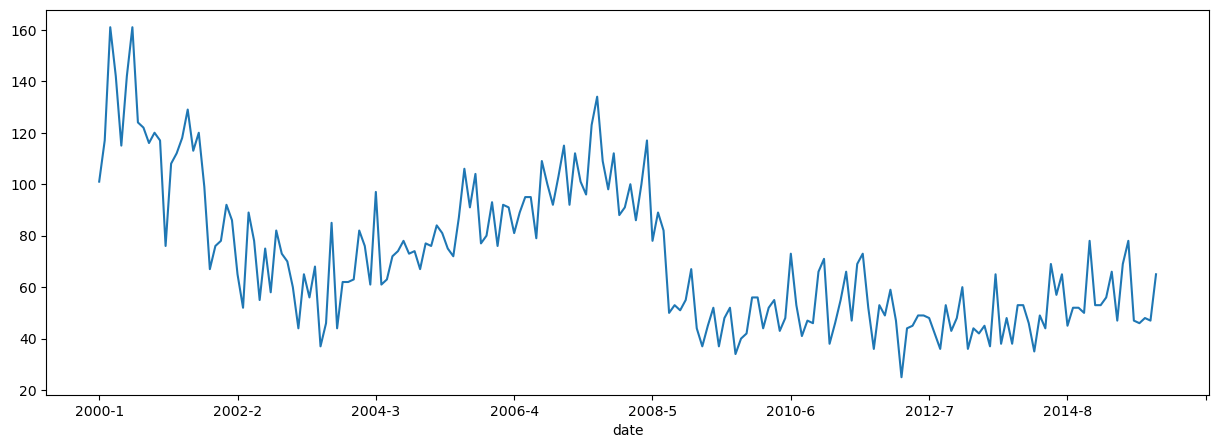

In [22]:
"""Forecasting """
historical_net = net_vol_monthly[net_vol_monthly.index < '2016-06']
endog = historical_net['vol']
endog.plot(figsize=(15,5))

In [23]:
"""Stationary test with Augmented Dickey Fuller Test"""
def stationary_test(timeseries):
    print('Result of ADF test: ')
    dftest = stf(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


stationary_test(endog)
# test statistic > critical value, which implies that the series is not stationary.
# Thus, we need to first transform the time series to make it stationary for VAR forcast

Result of ADF test: 
Test Statistic                  -2.621441
p-value                          0.088646
#Lags Used                       5.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64


Result of ADF test: 
Test Statistic                  -3.179516
p-value                          0.021201
#Lags Used                      12.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


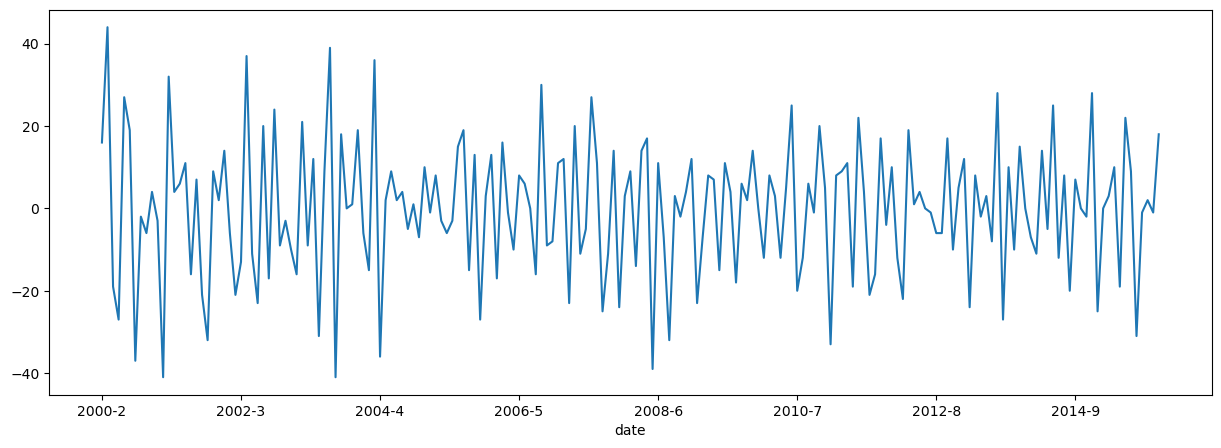

In [24]:
"""Transforming to stationary data for forecasting"""
transformed_endog = endog.diff()
transformed_endog.dropna(axis=0, inplace=True)
transformed_endog.plot(figsize=(15,5))
stationary_test(transformed_endog)

## Forecast with arima

In [25]:
forcast_res1 = sm.tsa.SARIMAX(transformed_endog)
forcast_arima = forcast_res1.fit()
forcast_arima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14922D+00    |proj g|=  1.08641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   5.013D-05   4.149D+00
  F =   4.1492240572645445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    vol   No. Observations:                  191
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -792.502
Date:                Mon, 28 Nov 2022   AIC                           1589.004
Time:                        10:59:38   BIC                           1595.508
Sample:                    02-01-2000   HQIC                          1591.638
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3678      0.070     -5.264      0.000      -0.505      -0.231
sigma2       235.1243     22.845     10.292      0.000     190.350     279.899
===================================================================================
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.06   Prob(JB):                         0.71
Heteroskedasticity (H):               0.52   Skew:                            -0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
fosum = forcast_arima.get_forecast(steps=50)
fosum.summary_frame()


vol,mean,mean_se,mean_ci_lower,mean_ci_upper
2016-01-01,-6.620983e+00,15.333765,-36.674610,23.432643
2016-02-01,2.435412e+00,16.338201,-29.586874,34.457698
2016-03-01,-8.958236e-01,16.469398,-33.175251,31.383603
2016-04-01,3.295129e-01,16.487069,-31.984548,32.643574
2016-05-01,-1.212055e-01,16.489458,-32.439950,32.197539
2016-06-01,4.458332e-02,16.489782,-32.274795,32.363961
2016-07-01,-1.639919e-02,16.489825,-32.335863,32.303064
2016-08-01,6.032154e-03,16.489831,-32.313443,32.325507
2016-09-01,-2.218822e-03,16.489832,-32.321696,32.317258
2016-10-01,8.161546e-04,16.489832,-32.318661,32.320293


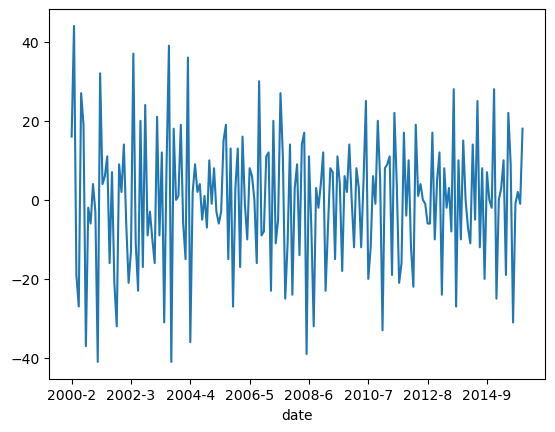

In [27]:
## Plot with the original endog_transformed
fig, ax = plt.subplots()
transformed_endog.plot(ax=ax)

## Plot the forecast boundaries
fcast = fosum.summary_frame()
# fcast['mean'].plot(ax=ax, style='k--')
# ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

## Forecast with vector autoregression

In [28]:
diff_gdp= var_monthly[['vol', 'EXUSUK', 'Interest_Rate', 'SMI']]
diff_gdp.vol = diff_gdp.vol.diff()
diff_gdp.drop(index=diff_gdp.index[0], axis=0, inplace=True)
diff_gdp

/var/folders/ws/l0gf3b2n0mj6s2k8j0nwk_9c0000gn/T/ipykernel_85423/3793558580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_gdp.vol = diff_gdp.vol.diff()
/var/folders/ws/l0gf3b2n0mj6s2k8j0nwk_9c0000gn/T/ipykernel_85423/3793558580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_gdp.drop(index=diff_gdp.index[0], axis=0, inplace=True)


,vol,EXUSUK,Interest_Rate,SMI
1,16.0,1.6000,5.6347,1201.506
2,44.0,1.5799,5.3707,1188.530
3,-19.0,1.5823,5.3213,1232.977
4,-27.0,1.5090,5.4033,1181.588
5,27.0,1.5092,5.2097,1164.447
...,...,...,...,...
259,21.0,1.3797,0.6440,1154.280
260,-6.0,1.3732,0.8023,1150.933
261,3.0,1.3701,1.0830,1113.011
262,-6.0,1.3463,0.9394,1167.690


In [29]:
diff_gdp.index.name = 'Date'
# diff_gdp.index = gdp_quarter['Date'] <
new_diff = diff_gdp.diff().drop(index=diff_gdp.index[0], axis=0, inplace=True)
forecast_gdp = VAR(diff_gdp)
forecast_res = forecast_gdp.fit(maxlags=15, method='ols')
forecast_res.summary()

/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Nov, 2022
Time:                     10:59:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    6.11645
Nobs:                     248.000    HQIC:                   4.05125
Log likelihood:          -1493.39    FPE:                    14.8927
AIC:                      2.65969    Det(Omega_mle):         6.17942
--------------------------------------------------------------------
Results for equation vol
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -6.764101         8.908727           -0.759           0.448
L1.vol                   -0.712987         0.072921           -9.777           0.000
L1.EXUSUK                28.680302        29.8

In [30]:
train_length = int(len(diff_gdp) * 0.8)
test_length = int(len(diff_gdp) * 0.2)
train_part = diff_gdp[ : train_length]
test = diff_gdp[train_length: ]
test.shape
# predictioins = forecast_res.forecast(diff_gdp.vol, steps=len())

(53, 4)

In [31]:
var_test = VAR(train_part)
var_ = var_test.fit(3)
var_.summary()

/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Nov, 2022
Time:                     10:59:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.35974
Nobs:                     207.000    HQIC:                   2.86109
Log likelihood:          -1383.96    FPE:                    12.4684
AIC:                      2.52253    Det(Omega_mle):         9.77239
--------------------------------------------------------------------
Results for equation vol
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -7.119845         8.474037           -0.840           0.401
L1.vol                  -0.619536         0.071133           -8.710           0.000
L1.EXUSUK                8.007766        31.026485

In [32]:
lag = var_.k_ar
# prediction = var_.forecast(train_part[-lag: ], steps=len(test))
# prediction